In [1]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Data/Shots/CalPolyShots.csv").reset_index()
data.dropna(inplace=True)

In [3]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities.to_csv("Shots/calPolyOrigins.csv",index = False)

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

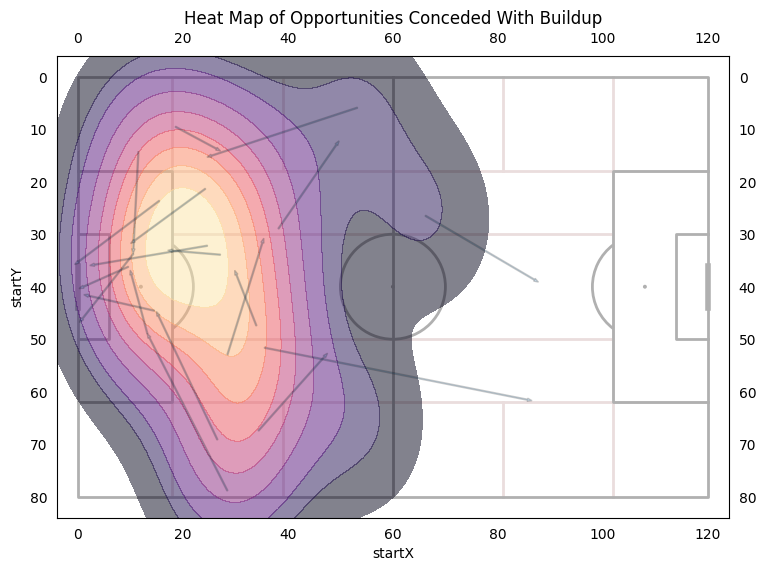

In [4]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [5]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [6]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side
0,1,Cal Poly,0.0,Pass,Unsuccessful,"[66.19047619047618, 26.47619047619048]","[86.95238095238093, 38.66666666666667]",UCSD,17.0,66.190476,26.476190,86.952381,38.666667,left
3,7,Cal Poly,1.0,Pass,Unsuccessful,"[34.38095238095237, 67.42857142857143]","[46.95238095238094, 53.333333333333336]",UCSD,19.0,34.380952,67.428571,46.952381,53.333333,left
6,13,Cal Poly,2.0,Tackle,Successful,"[32.66666666666665, 13.523809523809533]","[-1, -1]",Opponent,8.0,32.666667,13.523810,-1.000000,-1.000000,left
9,19,Cal Poly,3.0,Pass,Successful,"[38.19047619047618, 28.95238095238095]","[49.23809523809522, 12.952380952380949]",Opponent,-1.0,38.190476,28.952381,49.238095,12.952381,left
12,25,Cal Poly,4.0,Throw-in,Successful,"[91.52380952380952, 1.142857142857153]","[106.38095238095238, 30.285714285714292]",Opponent,-1.0,28.476190,78.857143,13.619048,49.714286,right
15,31,Cal Poly,5.0,Tackle,Successful,"[66.57142857142856, 14.666666666666671]","[-1, -1]",Opponent,23.0,53.428571,65.333333,121.000000,81.000000,right
18,37,Cal Poly,6.0,Pass,Unsuccessful,"[84.47619047619045, 28.38095238095238]","[34.38095238095237, 18.47619047619048]",UCSD,2.0,35.523810,51.619048,85.619048,61.523810,right


Text(0.5, 1.0, 'Opponent Shots Origin')

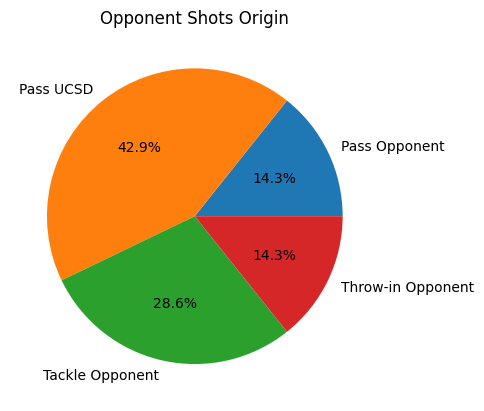

In [7]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shots Origin")

In [8]:
origins[origins.get("Event")=="Set Piece"].shape[0]

0

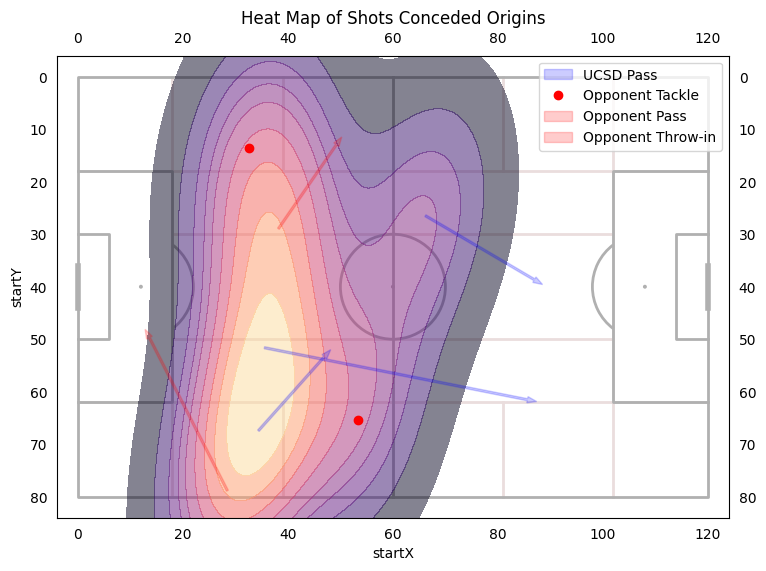

In [9]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


7

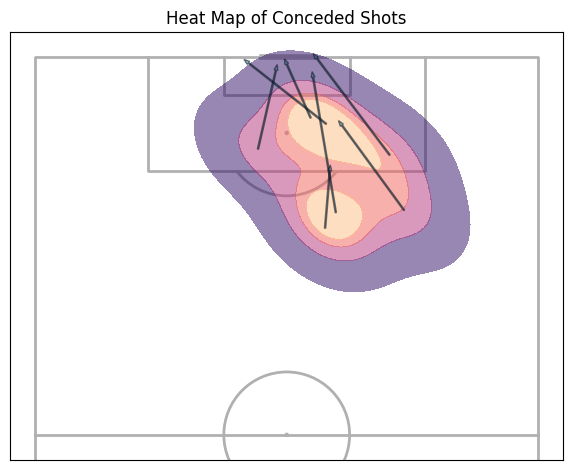

In [10]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Conceded Shots")
shots.shape[0]

In [11]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
shotAssists = shotAssists[shotAssists.get("Event")!="Set Piece"]

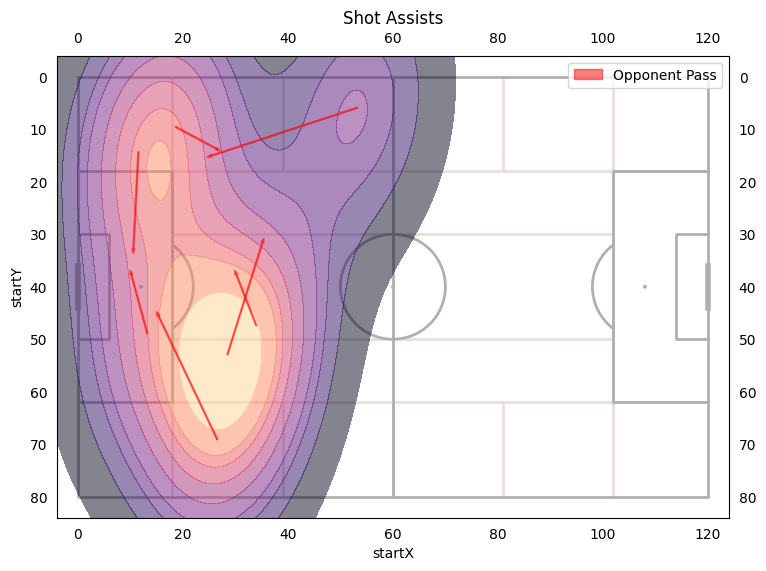

In [12]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

ValueError: 'label' must be of length 'x'

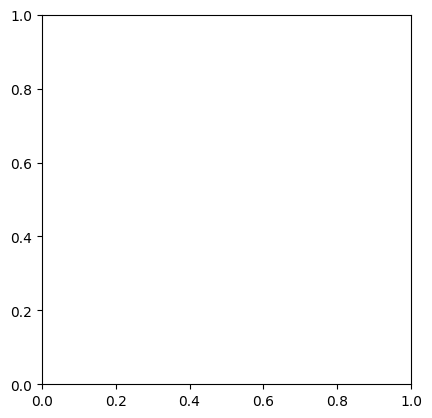

In [13]:
counts = shotAssists.groupby(["Event","Team"]).count()
plt.pie(counts.get("Game"),labels=["Lipscomb Pass","UCSD Tackle","Lipscomb Tackle"],autopct='%1.1f%%')
plt.title("Shot Assists")